In [21]:
import sys, os
sys.path.append('/cr/users/filip/bin/')

from utils.Auger.SD import Monitoring

from utils.binaries import *
from utils.plotting import *

In [31]:
from scipy.stats import norm
from scipy.optimize import curve_fit

ADC_bin_edges = np.array([2*k for k in range(100)] + [200 + 8*k for k in range(51)])
ADC = 0.5 * (ADC_bin_edges[1:] + ADC_bin_edges[:-1])
online_cut_threshold = 80
i_cut = np.argmin(np.abs(online_cut_threshold - ADC))

def make_histo(counts):
    histo = []
    skip_to_peak = 5
    stop_at_tail = 45

    for i, count in enumerate(counts[skip_to_peak:stop_at_tail]):
        histo += [ADC[i + skip_to_peak] for _ in range(int(count))]

    return histo

def gauss(x, A, mu, sigma):
    return A * np.exp(((x - mu)/(np.sqrt(2) * sigma))**2)

container = []
for month in ['dec2021', 'mar2022', 'jun2022', 'sep2022', 'dec2022', 'mar2022', 'jun2023', 'sep2023', 'dec2023']:
# for month in ['dec2021', 'dec2022', 'dec2023']:
# for month in ['jun2022', 'jun2023']:
    try:
        data = np.loadtxt(f"/cr/users/filip/Data/SDMonitHistos/out_{month}.txt")
    except FileNotFoundError: 
        print(f'{month} not in data yet, please create it Ü ...')
        continue

    for i, row in enumerate(data):

        # histogram = make_histo(row[2:])
        # mu, std = norm.fit(histogram)

        start, stop = 20, 80
        popt, pcov = curve_fit(gauss, ADC[start:stop], row[2+start:2+stop], 
            p0=[sum(row[2:]), 45, 10],
            bounds=([0, 20, 0],[np.inf, 60, np.inf]))
        mip_peak = popt[1]

        rate_above_cut = sum(row[2 + i_cut:]) / 61
        ratio = rate_above_cut / mip_peak
        container.append([row[1], mip_peak, rate_above_cut, ratio, row[2:], month])

    #     break
    # break

df = pd.DataFrame(container, columns=("time", "mip_peak", "rate_above_cut", "ratio", "counts", "month"))


IndentationError: unexpected indent (1601627420.py, line 40)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


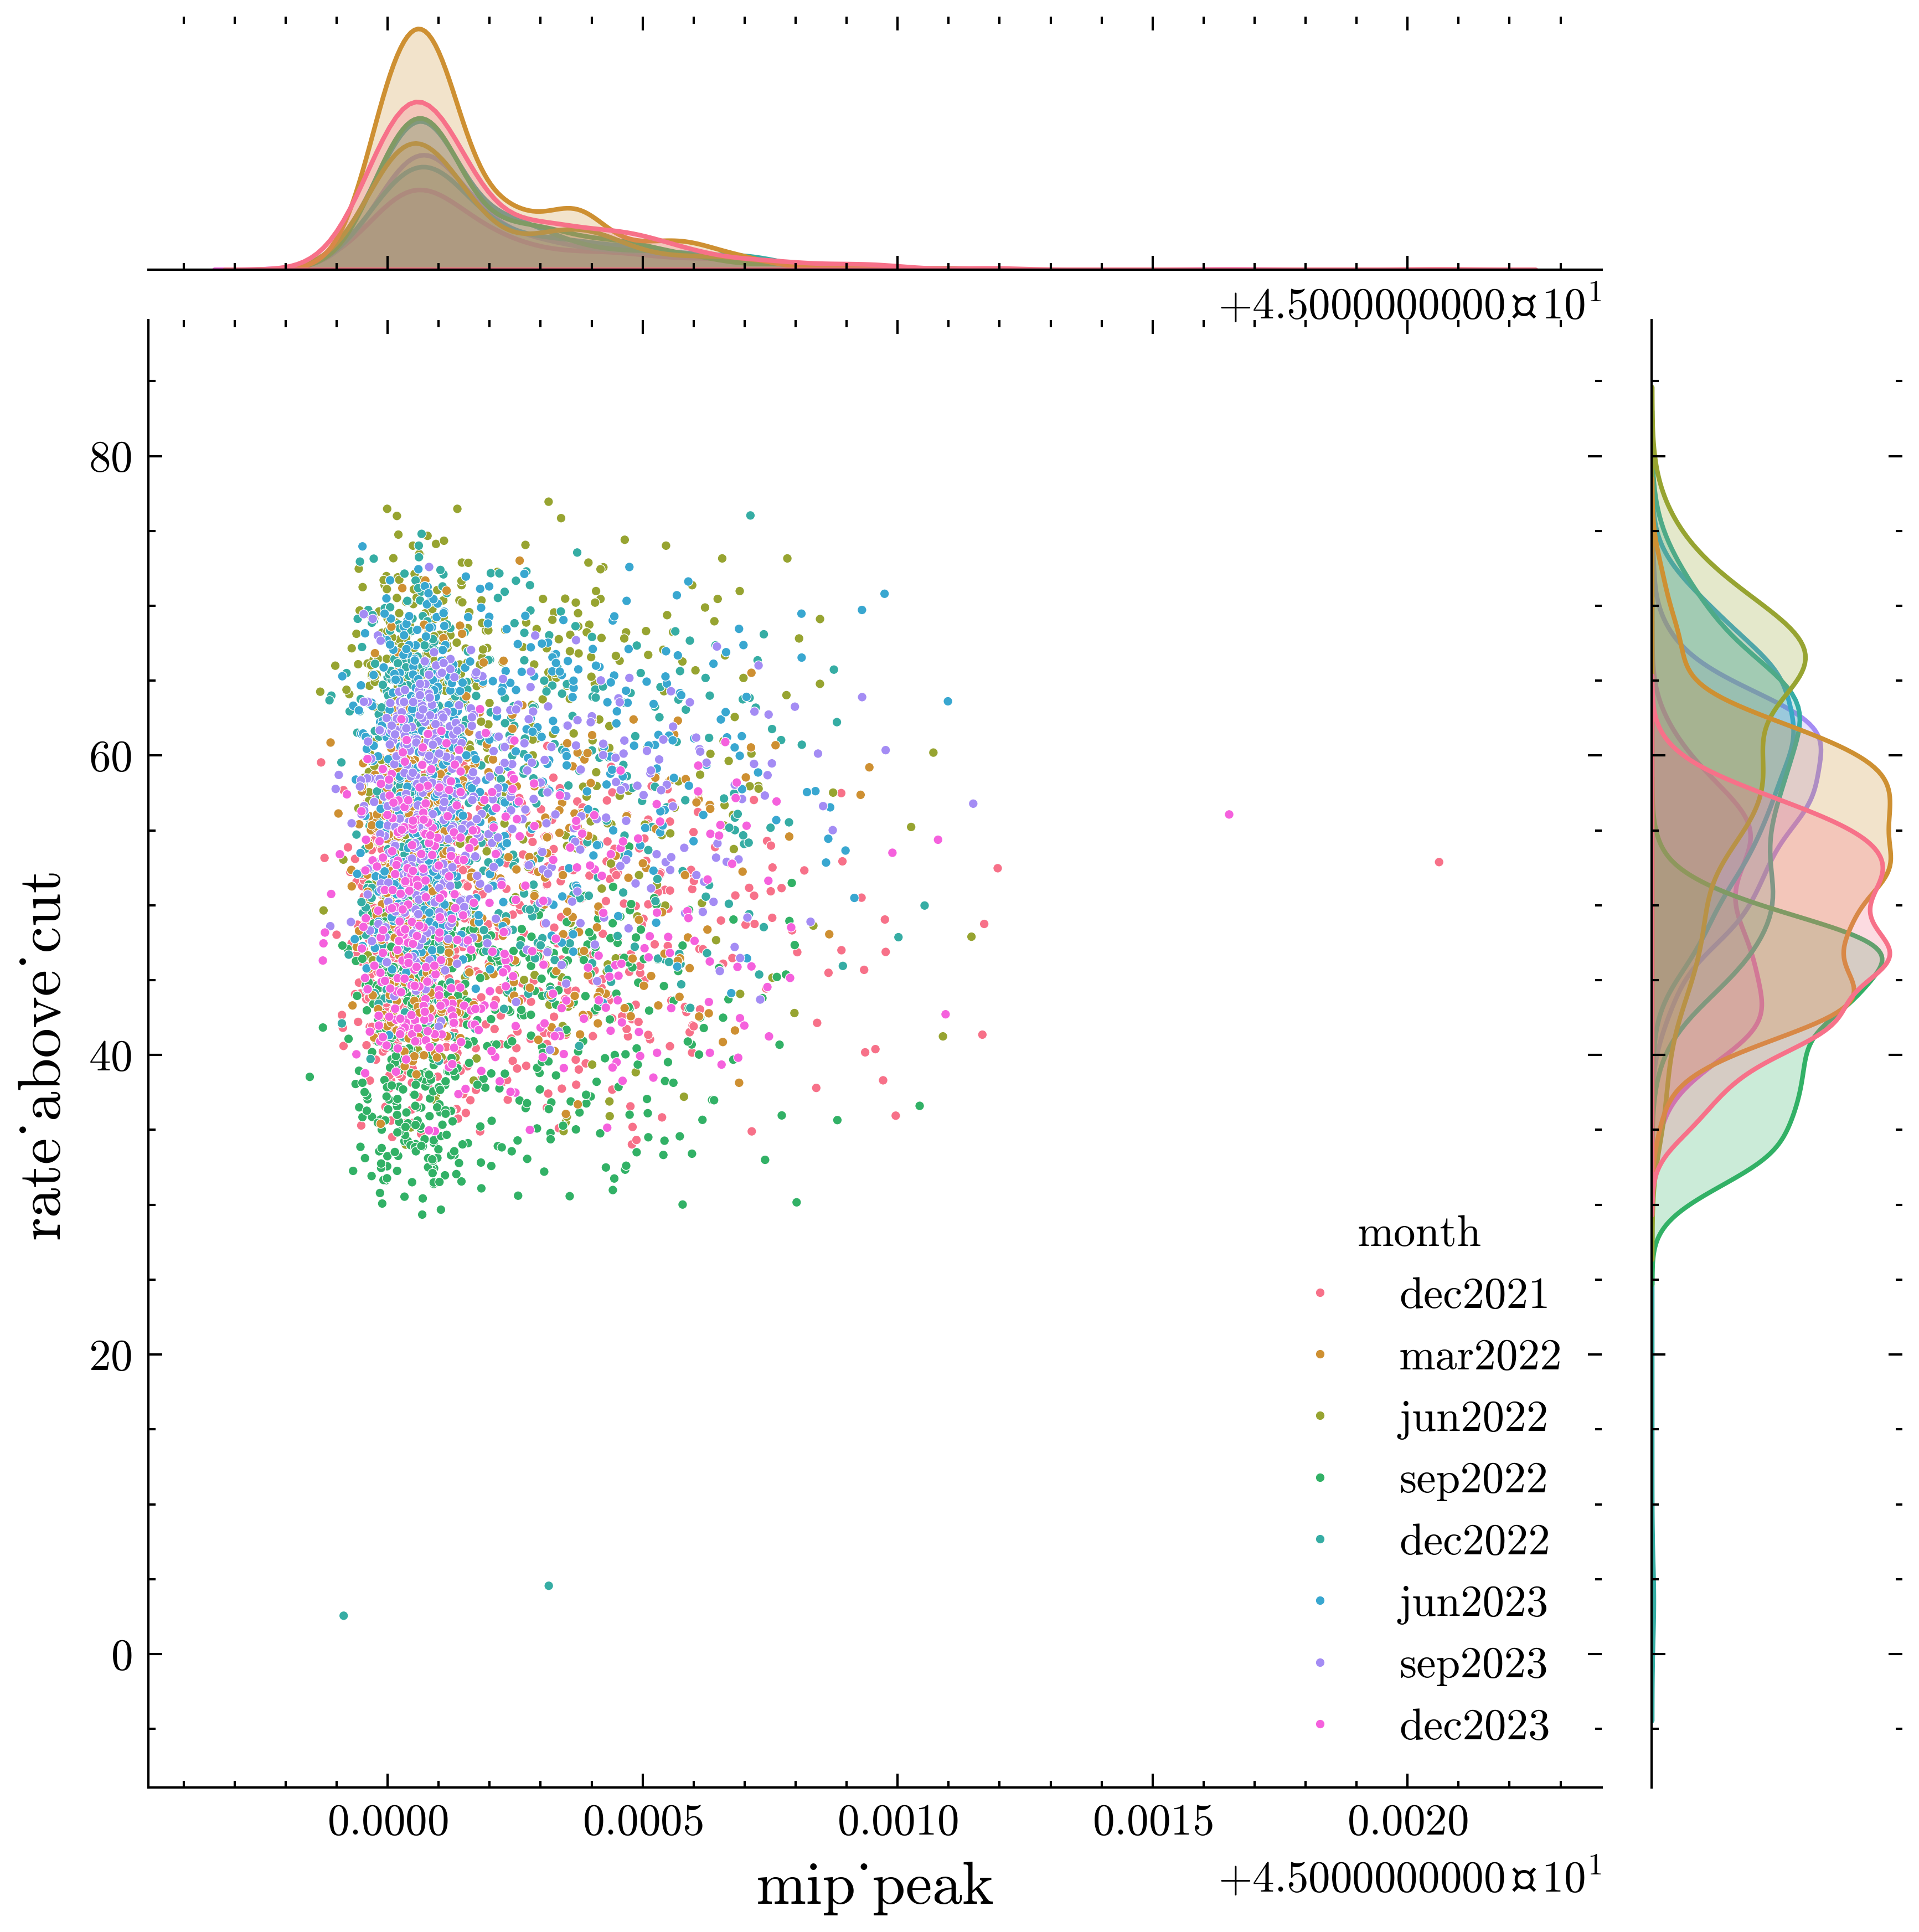

In [29]:
so.jointplot(df, x='mip_peak', y='rate_above_cut', hue='month', kind='scatter')

In [ ]:
print(df.ratio.mean())
df

In [ ]:
maybe_fuckup = df.loc[df.ratio == df.ratio.max()]
good_event = df.loc[3]

plt.plot(ADC, maybe_fuckup.counts.values[0], label='"bad event"')
plt.axvline(maybe_fuckup.mip_peak.values, c='k')
plt.plot(ADC, good_event.counts, label='"good event"')
plt.axvline(good_event.mip_peak, c='r',ls='--')
plt.legend()
# plt.ylim(0, 1200)
# plt.xlim(10, 200)

plt.yscale('log')

In [ ]:
plt.scatter(df.time.values, df.mip_peak.values)

In [ ]:
plt.plot(ADC, df.loc[3].counts)

plt.axvline(20)
plt.axvline(100)